In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
# Read the data from file and display random 5 records to get the glimpse of the data.
Vehicle_df = pd.read_csv("vehicle.csv")
Vehicle_df.sample(5)

compactness  circularity  distance_circularity  radius_ratio  \
350           97         46.0                 101.0         210.0   
284           89         46.0                  77.0         125.0   
127           85         41.0                  66.0         155.0   
523           90         43.0                  81.0         231.0   
323           98         51.0                  96.0         203.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
350                  66.0                        8          192.0   
284                  52.0                       10          156.0   
127                  65.0                       22          149.0   
523                  97.0                       46          150.0   
323                  66.0                       10          188.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
350           35.0                    22.0                        151   
284           44.0                    20.0                        160   
127           45.0                    19.0                        139   
523           45.0                    19.0                        149   
323           35.0                    22.0                        157   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
350            208.0              546.0                      169.0   
284            171.0              351.0                      177.0   
127            173.0              330.0                      155.0   
523            200.0              332.0                      164.0   
323            207.0              533.0                      231.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
350                         66.0             1.0              32.0   
284                         78.0             7.0              17.0   
127                         75.0             6.0              16.0   
523                         91.0             5.0               9.0   
323                         68.0            10.0               1.0   

     skewness_about.2  hollows_ratio class  
350             191.0            200   car  
284             183.0            191   van  
127             184.0            191   bus  
523             186.0            196   van  
323             191.0            199   car

In [3]:

# Get the rows and column count.
Vehicle_df.shape

(846, 19)

In [4]:
# Get the datatypes of each column.
Vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
# As class is categorical and being our target variable, lets get the size of data based on class.
Vehicle_df.groupby(['class']).size()

class
bus    218
car    429
van    199
dtype: int64

In [6]:
# Lets check for duplicate values and delete.
Vehicle_df.duplicated().sum()

0

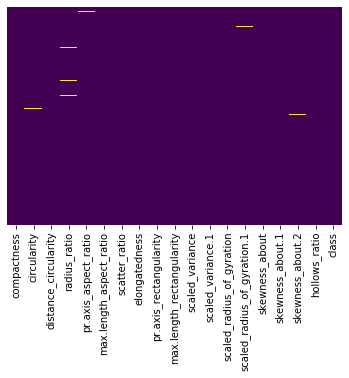

In [7]:
# Visualize the null/missing values using heatmap.
sns.heatmap(Vehicle_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# Get the count of null values in each column.
print ("Count of null values in each feature:\n", Vehicle_df.isna().sum())

Count of null values in each feature:
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233648A1A58>,
      dtype=object)

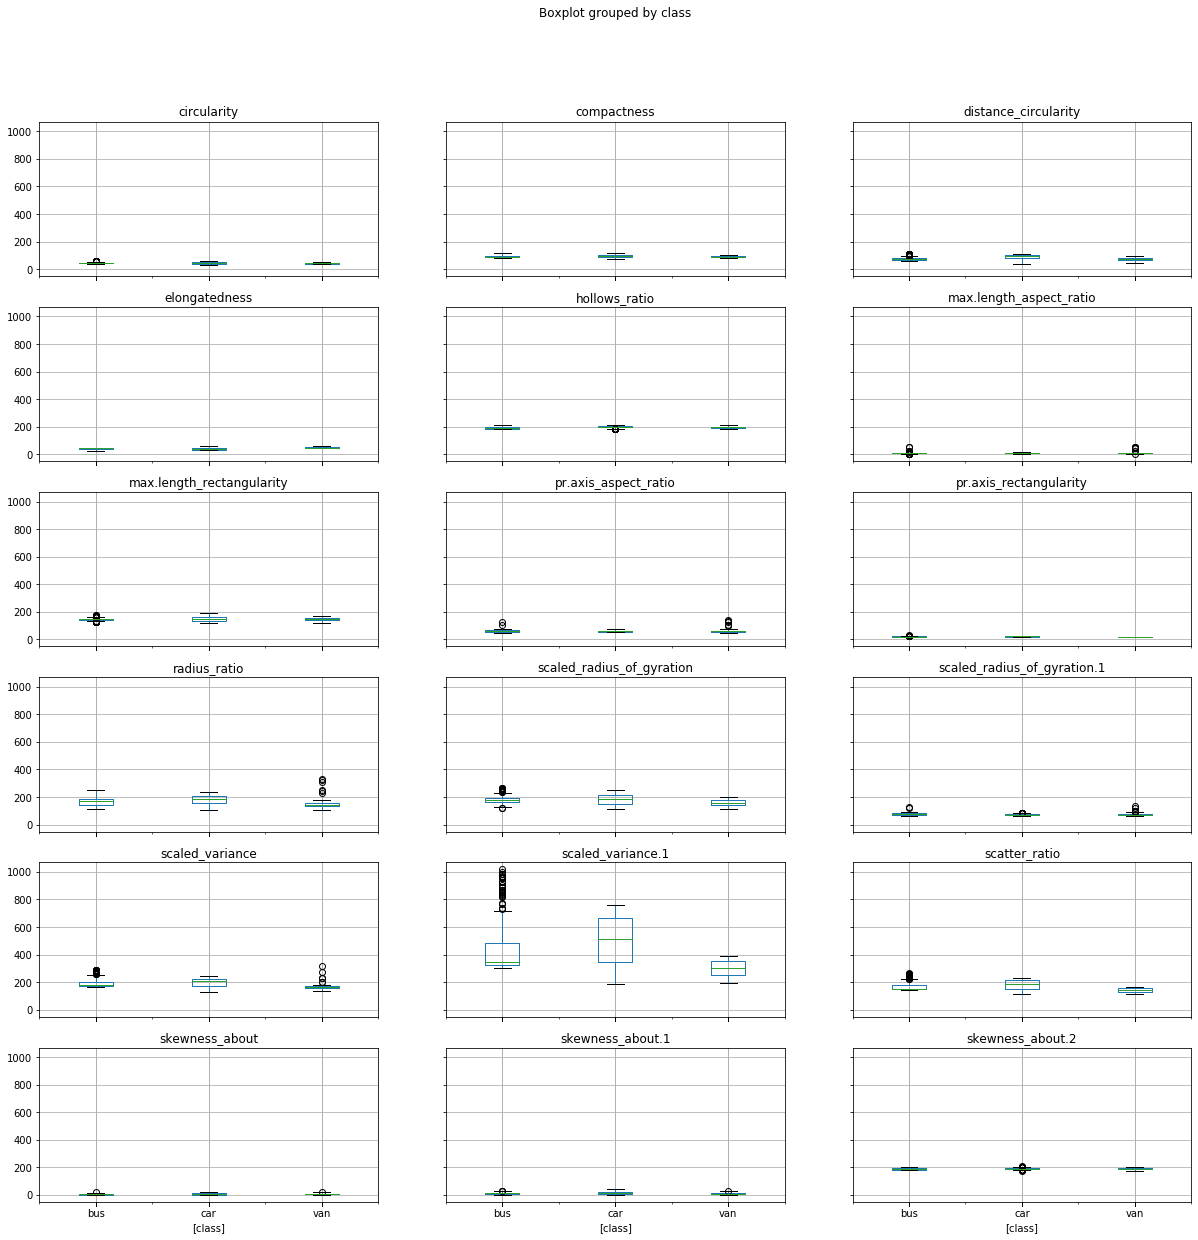

In [9]:
# Visualizing the outliers and skewness with boxplot grouped by class. As the class have influenze in the feature values.
Vehicle_df.boxplot(by = 'class',  layout=(6,3), figsize=(20, 20))

In [10]:
# Before splitting test and train, lets convert class feature from categorical datatype to numeric datatype 
# by using Label Encoding.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Vehicle_df['class'] = labelencoder.fit_transform(Vehicle_df['class'])

# Store the mapping in dict variable.
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

{'bus': 0, 'car': 1, 'van': 2}


In [11]:
# Get info to ensure the datatype of class feature.
Vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [12]:
# Get the data size based on class to ensure the correctness of mapping.
Vehicle_df.groupby(['class']).size()

class
0    218
1    429
2    199
dtype: int64

In [13]:
# Now lets split the data to test and train before imputing the median grouped by class for missingvalues/outliers 
# to avoid the influenze of test data in training data.
from sklearn import model_selection

X = Vehicle_df.iloc[:,:-1]
y = Vehicle_df['class']

test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [14]:
# Lets merge X_train and y_train to do missing value imputation with median grouped by class.
y_train_df = pd.Series(y_train, name='class')
Xy_train = pd.concat([X_train, y_train_df], axis=1)

# Lets merge X_test and y_test to do missing value imputation with median grouped by class.
y_test_df = pd.Series(y_test, name='class')
Xy_test = pd.concat([X_test, y_test_df], axis=1)

In [15]:
# Missing value imputation with median grouped by class.
def groupMeanValue(group):
    group = group.fillna(group.median())
    return group

Xy_train = Xy_train.groupby("class").transform(groupMeanValue)
Xy_train.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [16]:
Xy_test = Xy_test.groupby("class").transform(groupMeanValue)
Xy_test.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [17]:
X_train = Xy_train.copy(deep=True)
X_test = Xy_test.copy(deep=True)

In [18]:
# Standardizing and Imputing outliers with Median.
from scipy.stats import zscore

# Standardizing with zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

# Standardize feature space to have mean 0 and variance 1
#X_train = (X_train-np.mean(X_train,axis = 0))/np.std(X_train,axis = 0)
#X_test = (X_test-np.mean(X_test,axis = 0))/np.std(X_test,axis = 0)

In [19]:
# Addressing outliers at group level

def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()
    return group

# Lets merge X_train and y_train to do outlier imputation with median grouped by class.
Xy_train = pd.concat([X_train, y_train_df], axis=1)

# Lets merge X_test and y_test to do outlier imputation with median grouped by class.
Xy_test = pd.concat([X_test, y_test_df], axis=1)

X_train = (Xy_train.groupby('class').transform(replace)) 
X_test = (Xy_test.groupby('class').transform(replace))

C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002336566A2B0>,
      dtype=object)

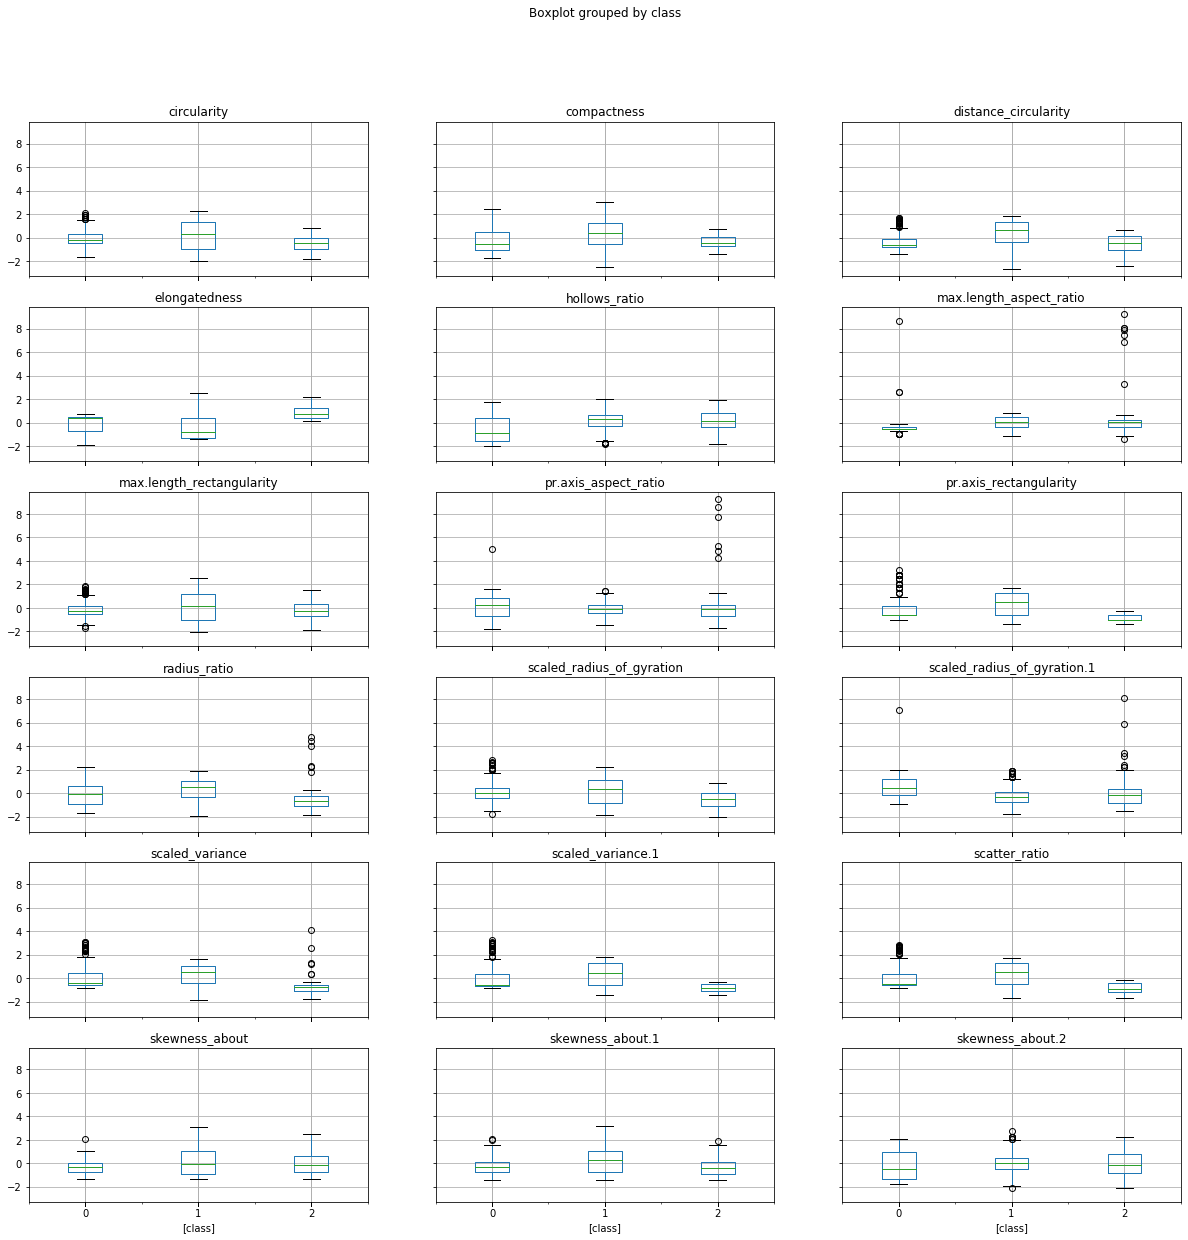

In [20]:
# Box plot before oulier removal grouped by class
Xy_train.boxplot(by = 'class',  layout=(6,3), figsize=(20, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023369D5FDA0>,
      dtype=object)

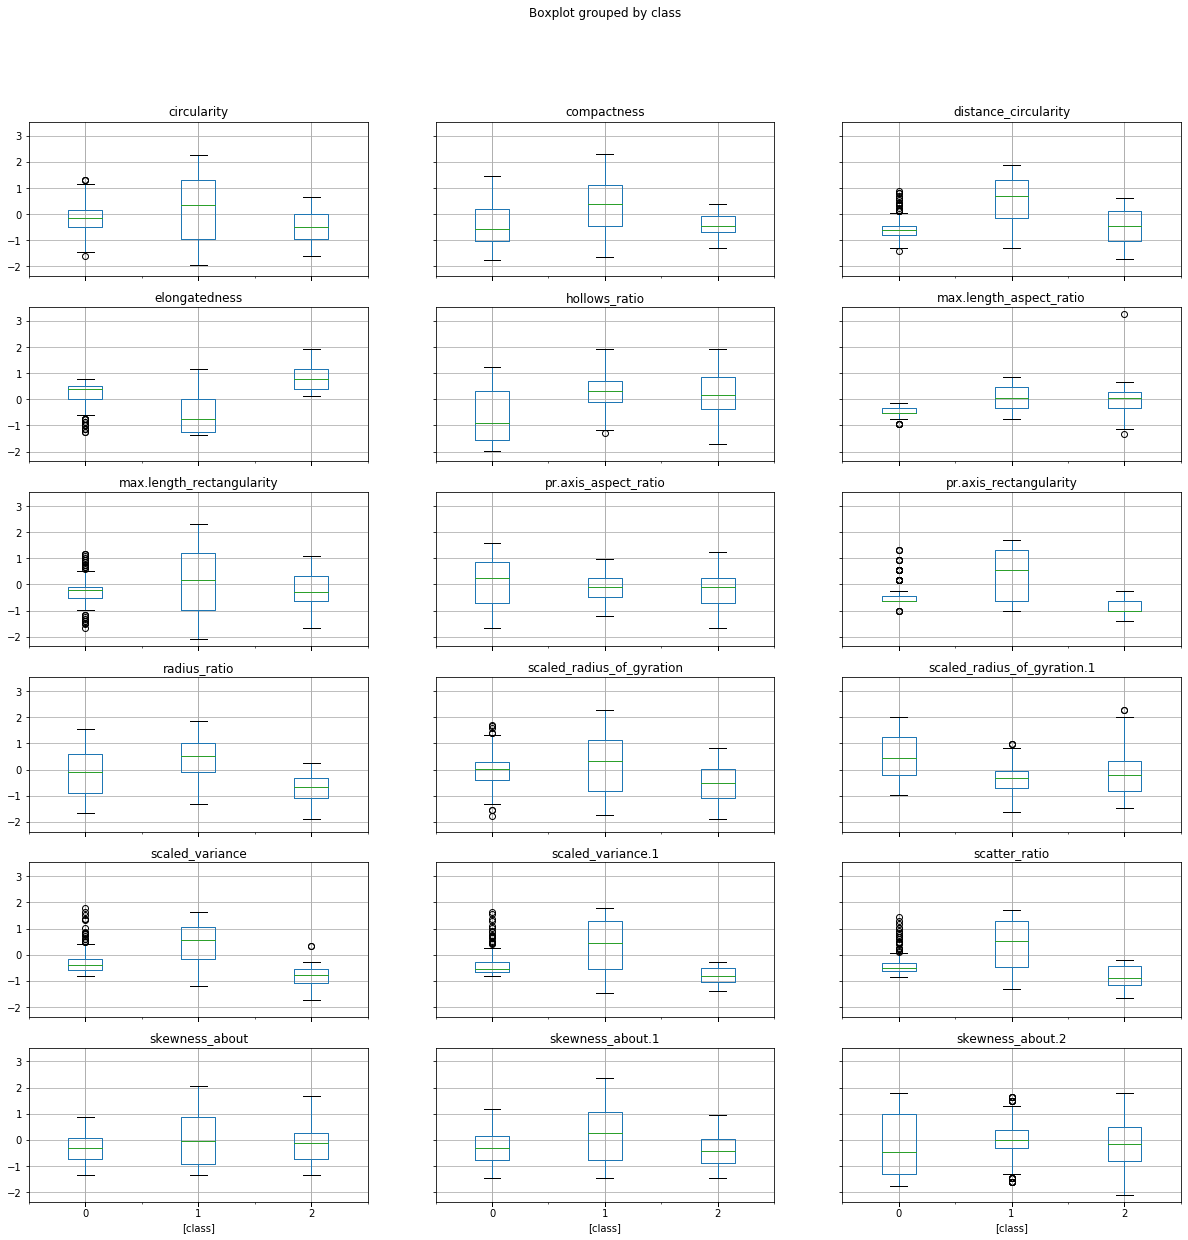

In [21]:
# Box plot after oulier removal grouped by class
Xy_train = pd.concat([X_train, y_train_df], axis=1)
Xy_test = pd.concat([X_test, y_test_df], axis=1)

Xy_train.boxplot(by = 'class',  layout=(6,3), figsize=(20, 20))

C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


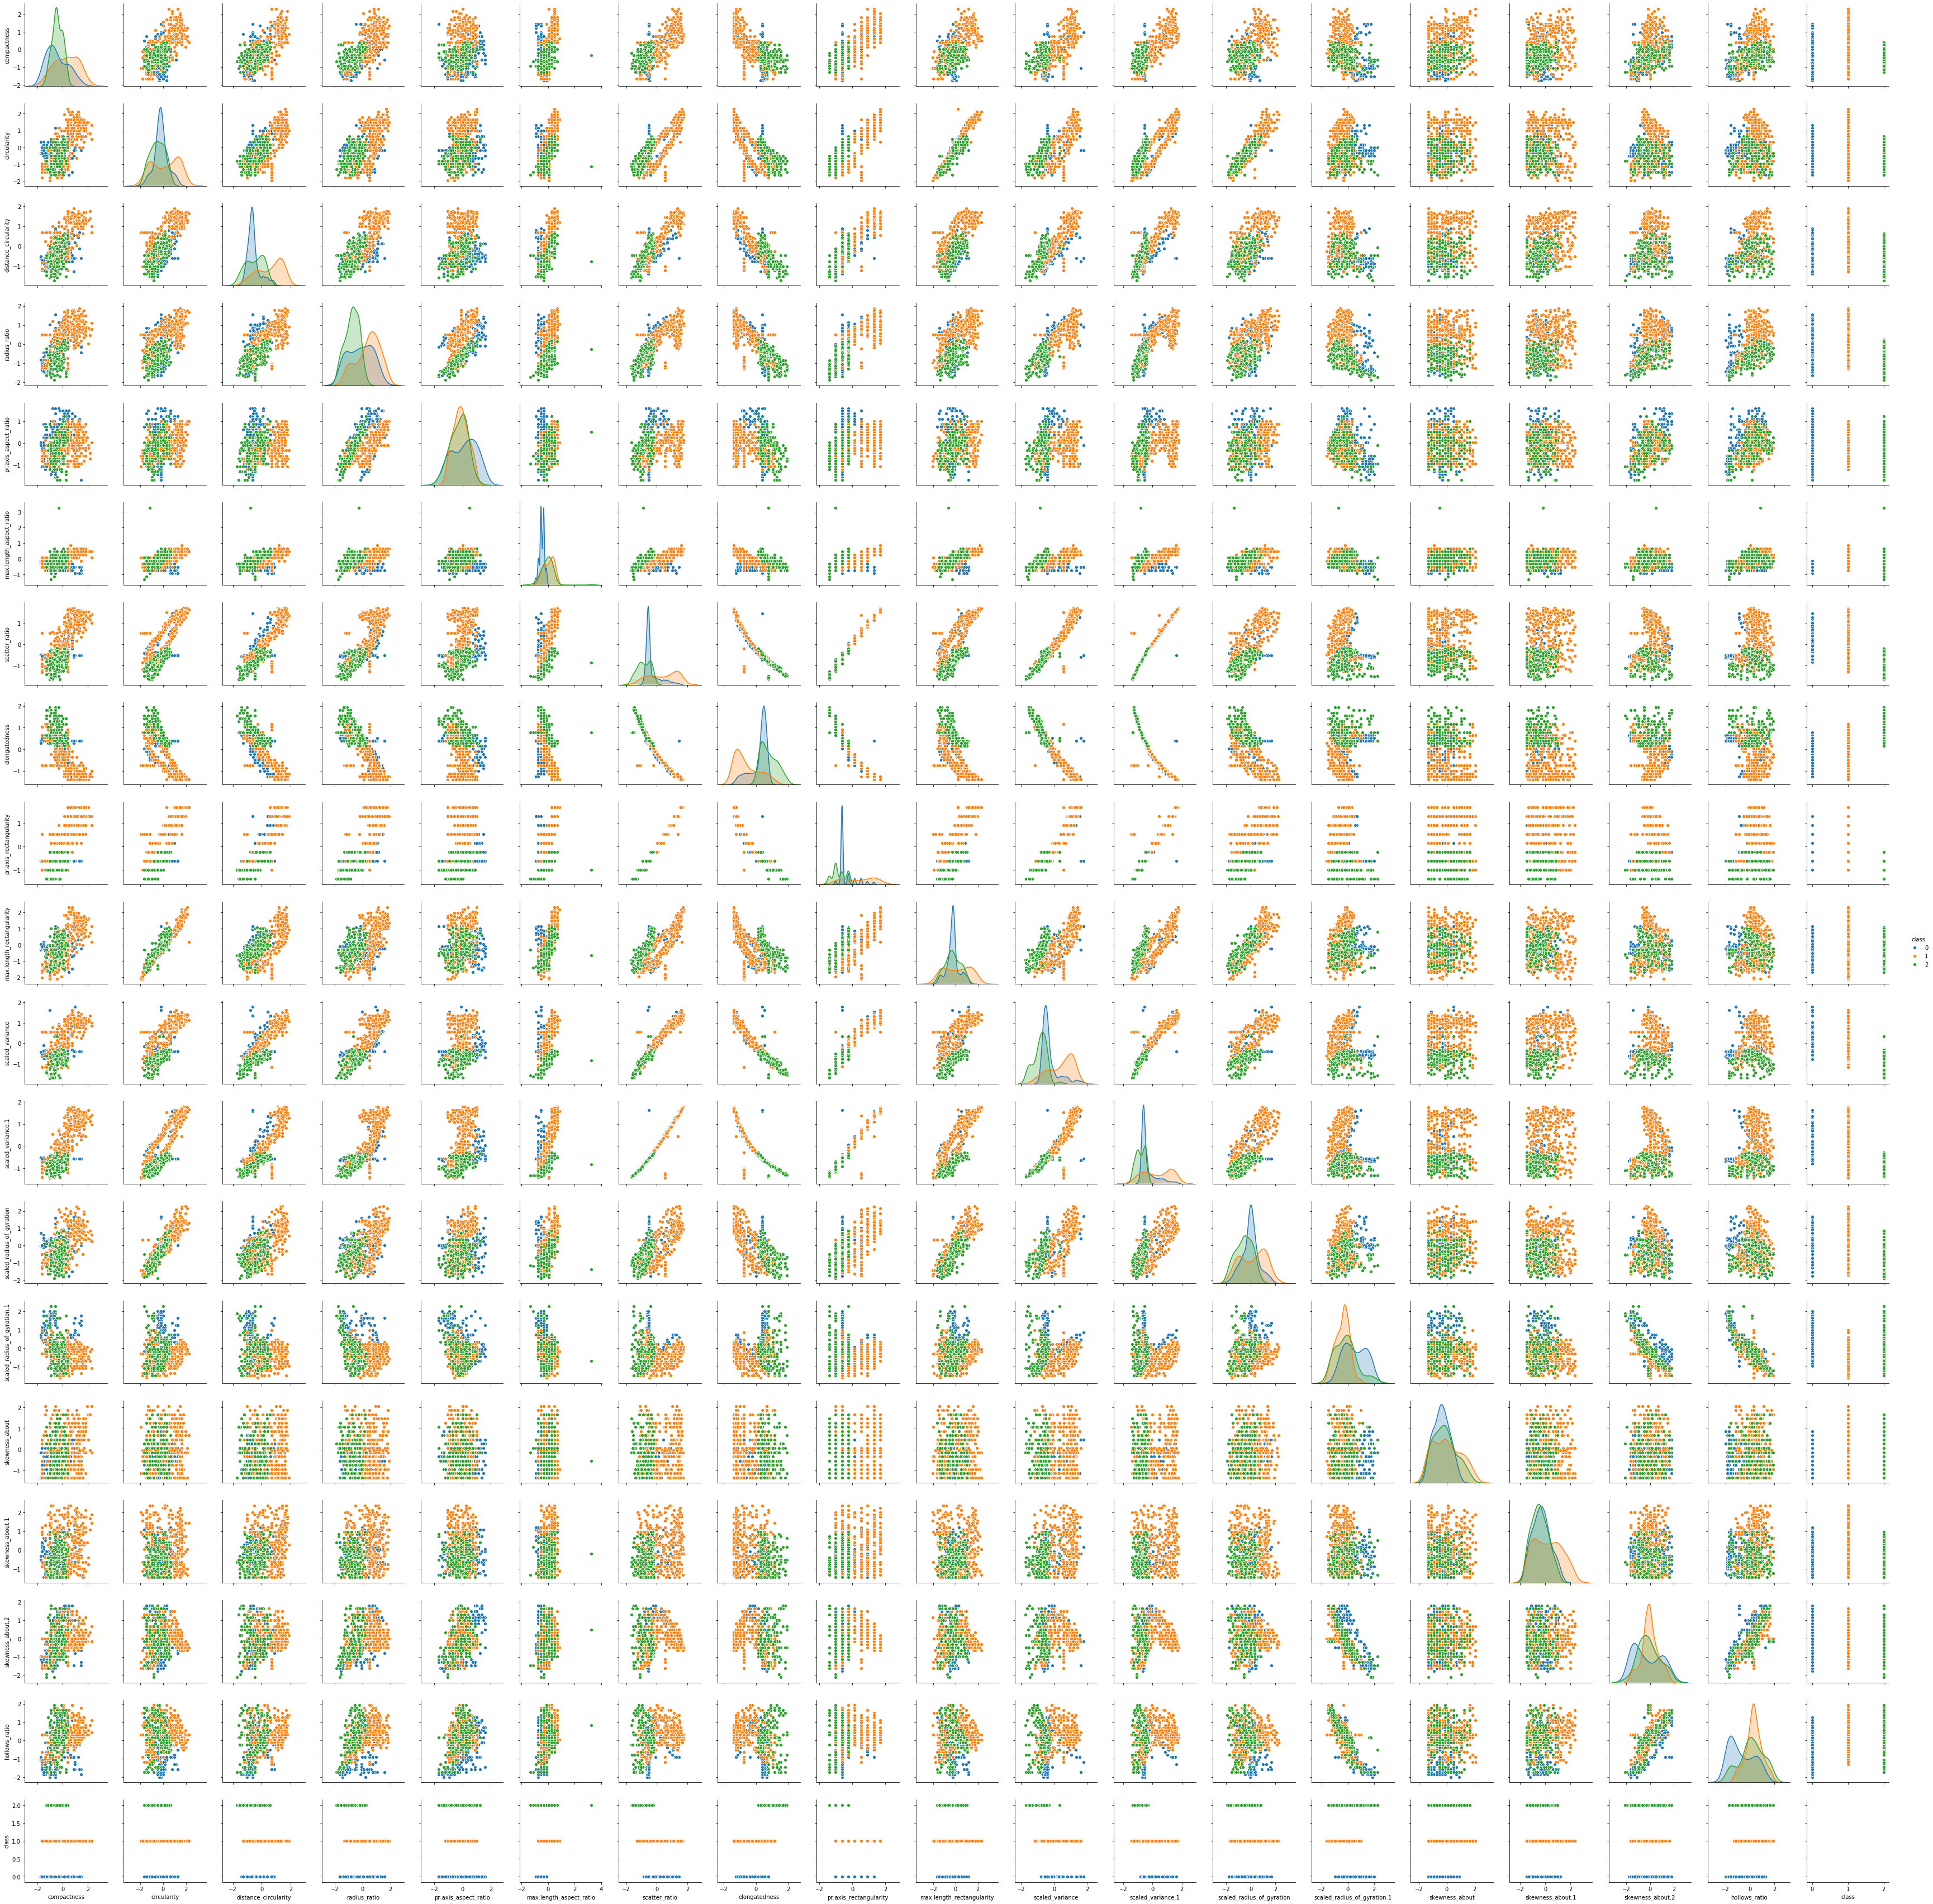

In [22]:
sns.pairplot(Xy_train, diag_kind='kde', hue='class')

From the diagonal Kde it is evident that, there are mixed gaussians.
Relationship between variables shows some correlation. Some are linear and some are not.
There are highly correlated independent variables.
There are some skewness in the data due to outliers.

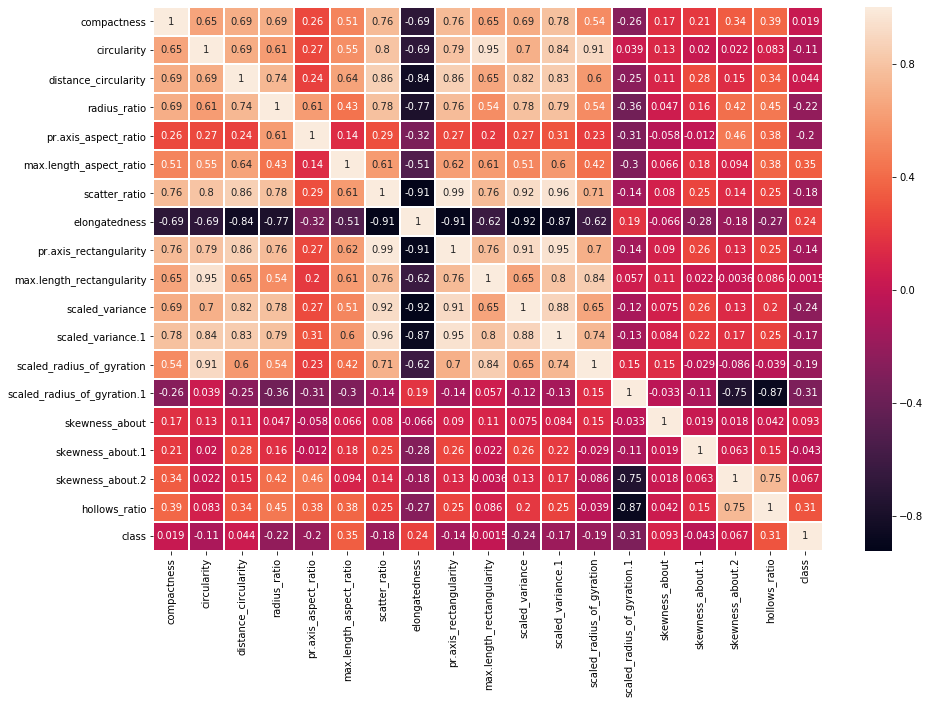

In [26]:
plt.subplots(figsize=(15,10))
sns.heatmap(Xy_train.corr(), annot=True, linewidths=1)

In [27]:
CorrMat = Xy_train.corr()
indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
if len(indices) == 0:
    print ("All the attributes have some corrrelation between them.")
else:
    print ("There is no significant correlation between the following attributes: ")
    print ("------------------------------------------------------------------------")
    print(indices)
    print("====================================================================")
    indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
    indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 18]
    if len(indices) == 0:
        print ('All the attributes have some corrrelation with class.')
    else:
        print ("There is no significant correlation between class and the following attributes: ", indices)

There is no significant correlation between the following attributes: 
------------------------------------------------------------------------
[('compactness', 'class'), ('circularity', 'scaled_radius_of_gyration.1'), ('circularity', 'skewness_about.1'), ('circularity', 'skewness_about.2'), ('circularity', 'hollows_ratio'), ('distance_circularity', 'class'), ('radius_ratio', 'skewness_about'), ('pr.axis_aspect_ratio', 'skewness_about'), ('pr.axis_aspect_ratio', 'skewness_about.1'), ('max.length_aspect_ratio', 'skewness_about'), ('max.length_aspect_ratio', 'skewness_about.2'), ('scatter_ratio', 'skewness_about'), ('elongatedness', 'skewness_about'), ('pr.axis_rectangularity', 'skewness_about'), ('max.length_rectangularity', 'scaled_radius_of_gyration.1'), ('max.length_rectangularity', 'skewness_about.1'), ('max.length_rectangularity', 'skewness_about.2'), ('max.length_rectangularity', 'hollows_ratio'), ('max.length_rectangularity', 'class'), ('scaled_variance', 'skewness_about'), ('sca

In [28]:
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant positive correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 18]
print ("There is significant positive correlation between class and the following attributes: ", indices)

There is significant positive correlation between the following attributes: 
------------------------------------------------------------------------
[('compactness', 'circularity'), ('compactness', 'distance_circularity'), ('compactness', 'radius_ratio'), ('compactness', 'pr.axis_aspect_ratio'), ('compactness', 'max.length_aspect_ratio'), ('compactness', 'scatter_ratio'), ('compactness', 'pr.axis_rectangularity'), ('compactness', 'max.length_rectangularity'), ('compactness', 'scaled_variance'), ('compactness', 'scaled_variance.1'), ('compactness', 'scaled_radius_of_gyration'), ('compactness', 'skewness_about'), ('compactness', 'skewness_about.1'), ('compactness', 'skewness_about.2'), ('compactness', 'hollows_ratio'), ('circularity', 'distance_circularity'), ('circularity', 'radius_ratio'), ('circularity', 'pr.axis_aspect_ratio'), ('circularity', 'max.length_aspect_ratio'), ('circularity', 'scatter_ratio'), ('circularity', 'pr.axis_rectangularity'), ('circularity', 'max.length_rectangu

In [29]:
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant negative correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 18]

if len(indices) == 0:
    print ("class do not have negative correlation with any attributes.")
else:
    print ("There is significant negative correlation between class and the following attributes: ", indices)

There is significant negative correlation between the following attributes: 
------------------------------------------------------------------------
[('compactness', 'elongatedness'), ('compactness', 'scaled_radius_of_gyration.1'), ('circularity', 'elongatedness'), ('circularity', 'class'), ('distance_circularity', 'elongatedness'), ('distance_circularity', 'scaled_radius_of_gyration.1'), ('radius_ratio', 'elongatedness'), ('radius_ratio', 'scaled_radius_of_gyration.1'), ('radius_ratio', 'class'), ('pr.axis_aspect_ratio', 'elongatedness'), ('pr.axis_aspect_ratio', 'scaled_radius_of_gyration.1'), ('pr.axis_aspect_ratio', 'class'), ('max.length_aspect_ratio', 'elongatedness'), ('max.length_aspect_ratio', 'scaled_radius_of_gyration.1'), ('scatter_ratio', 'elongatedness'), ('scatter_ratio', 'scaled_radius_of_gyration.1'), ('scatter_ratio', 'class'), ('elongatedness', 'pr.axis_rectangularity'), ('elongatedness', 'max.length_rectangularity'), ('elongatedness', 'scaled_variance'), ('elongate

Have listed the correlation between attributes in the above outputs.
There are highly correlated independent variables. PCA might work.
Class do not have significant correlation with the below features...
'compactness', 'distance_circularity', 'pr.axis_aspect_ratio', 'max.length_rectangularity', 'skewness_about.1', 'skewness_about.2'

In [30]:
# Eliminating the attributes (6) which has no signification correlation with class.
cols = [ 'compactness', 'distance_circularity', 'pr.axis_aspect_ratio', 'max.length_rectangularity', 'skewness_about.1', 'skewness_about.2']
X_train.drop(cols, axis=1, inplace=True)
X_test.drop(cols, axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 285 to 265
Data columns (total 12 columns):
circularity                    592 non-null float64
radius_ratio                   592 non-null float64
max.length_aspect_ratio        592 non-null float64
scatter_ratio                  592 non-null float64
elongatedness                  592 non-null float64
pr.axis_rectangularity         592 non-null float64
scaled_variance                592 non-null float64
scaled_variance.1              592 non-null float64
scaled_radius_of_gyration      592 non-null float64
scaled_radius_of_gyration.1    592 non-null float64
skewness_about                 592 non-null float64
hollows_ratio                  592 non-null float64
dtypes: float64(12)
memory usage: 80.1 KB


In [31]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
Explained_Variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_
print("Explianed Variance Ratio:\n", Explained_Variance)
print("\nSingular Values:\n", singular_values)

Explianed Variance Ratio:
 [0.61571761 0.17337386 0.0855321  0.05035942 0.02607447 0.01397354
 0.00981188 0.00855321 0.00683629 0.00522026 0.0037448  0.00080255]

Singular Values:
 [56.56812678 30.01738281 21.08363934 16.17787117 11.64095797  8.52185526
  7.14097037  6.66723074  5.96061938  5.20867362  4.4115946   2.04228612]


In [32]:
tot = sum(Explained_Variance)
var_exp = [( i /tot ) * 100 for i in sorted(Explained_Variance, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 61.57176126  78.90914769  87.46235776  92.49829985  95.10574646
  96.50309996  97.48428845  98.33960909  99.02323854  99.5452647
  99.91974517 100.        ]


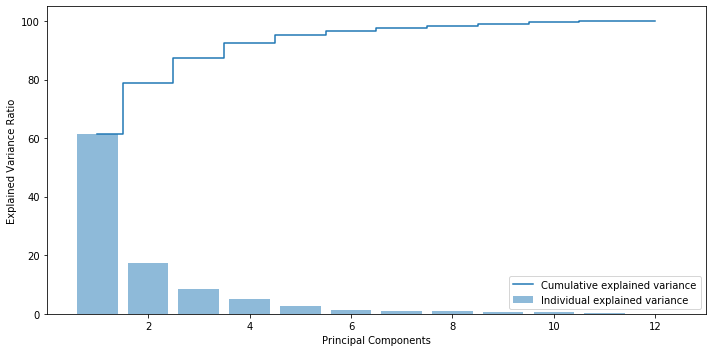

In [33]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, Explained_Variance.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, Explained_Variance.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

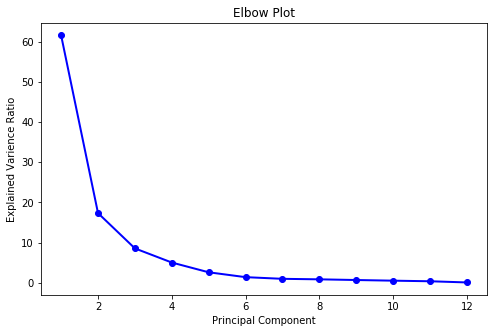

In [34]:

fig = plt.figure(figsize=(8,5))
plt.plot(range(1, Explained_Variance.size + 1), var_exp, 'bo-', linewidth=2)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Varience Ratio')
plt.show()

Observations:
There are unequal eigen values. PCA might work.
Based on the above explained varience... lets reduce the dimension to 8 (which covers the 98% of varience). The PC 9, 10, 11 and 12 have very less varience explained. Lets discard these the PC's from 9 to 12 and consider only the first 8 PC's.

In [35]:
# Create a PCA that will retain 98% of the variance
pca = PCA(n_components=.98)
pca.fit(X_train)

# Conduct PCA
X_train_pca = pca.transform(X_train)

In [36]:
print('Original number of features:', X_train.shape[1])
print('Reduced number of features:', X_train_pca.shape[1])

Original number of features: 12
Reduced number of features: 8


In [37]:

# Lets tranform the X_test also...
X_test_pca = pca.transform(X_test)

In [38]:
print('Original number of features:', X_test.shape[1])
print('Reduced number of features:', X_test_pca.shape[1])

Original number of features: 12
Reduced number of features: 8


C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


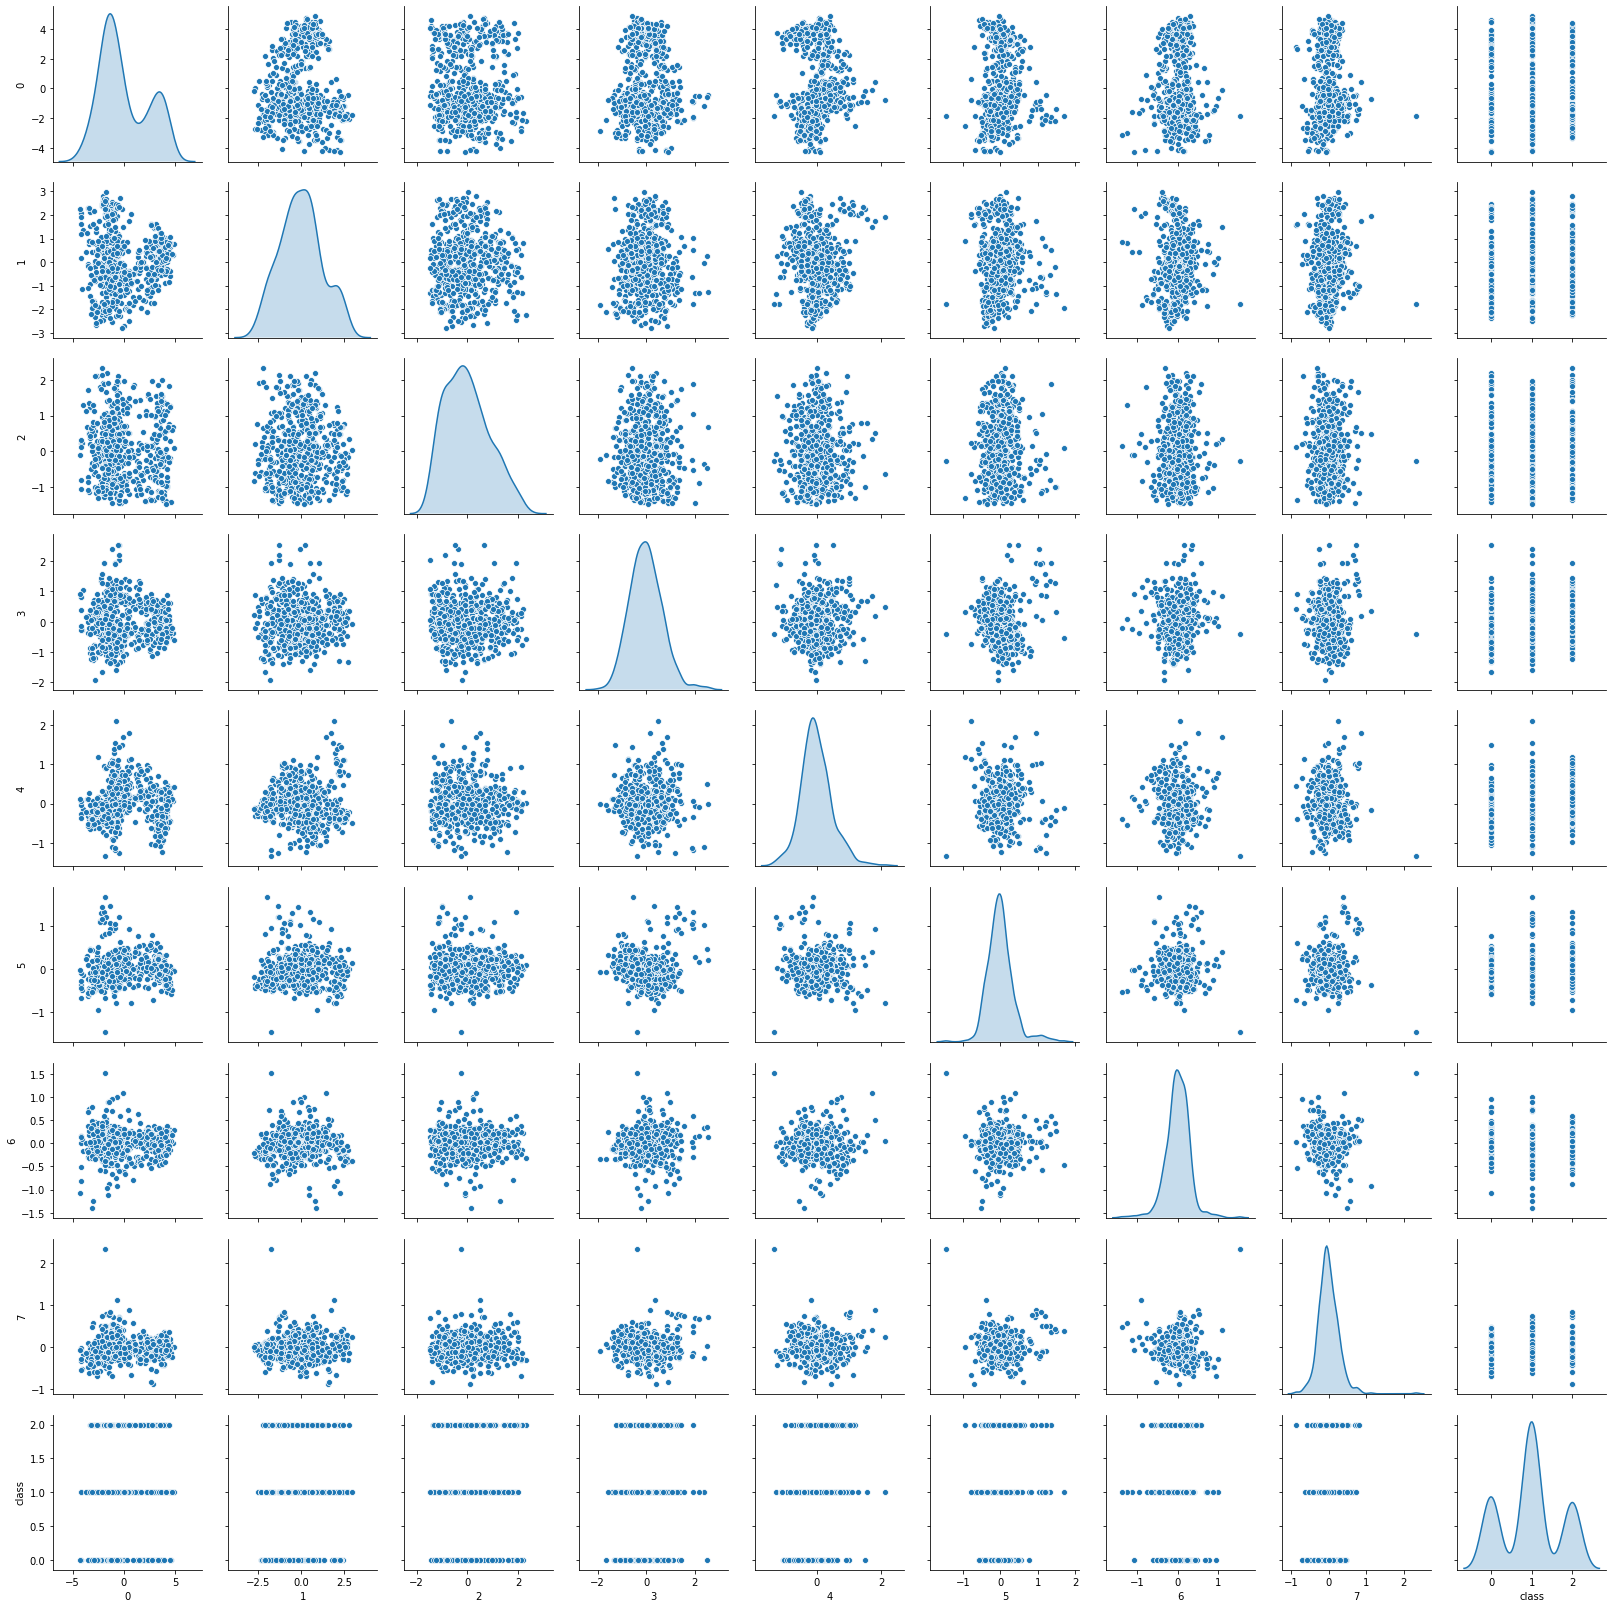

In [39]:
Proj_data_Train = pd.DataFrame(X_train_pca)  # converting array to dataframe for pairplot
Proj_data_Train = Proj_data_Train.join(y_train)
sns.pairplot(Proj_data_Train, diag_kind='kde')

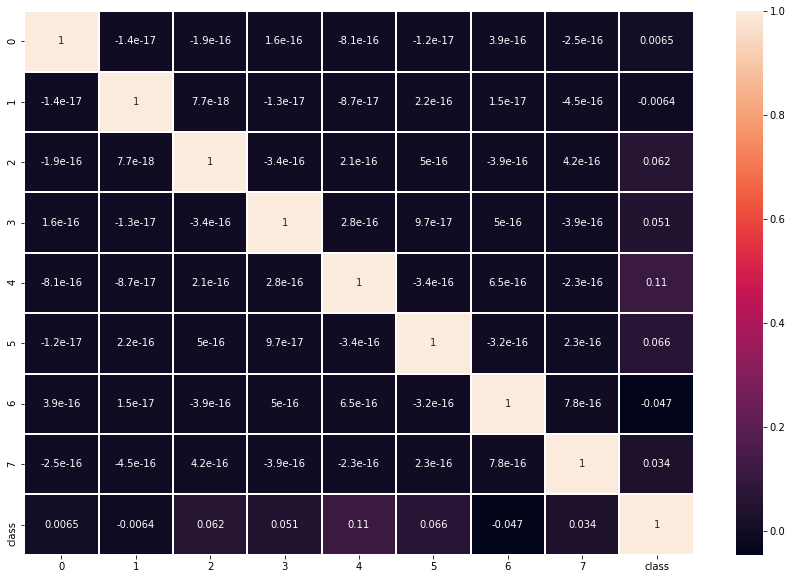

In [40]:
# Check for correlation of variable
plt.subplots(figsize=(15,10))
sns.heatmap(Proj_data_Train.corr(), annot=True, linewidths=1)

Observations:
All the correlations are eleminated between the independent variables.
Any of the PC is uncorrelated with all others.
There is no significant correlation between target (Class) and any of the PCA.
What was clearly visible as separate gaussians in original dimension is not visible any more. This is due to the fact that PCA dimesions are composite of the original dimensions

In [41]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_pca, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.91


C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
param_grid = [{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}]

In [43]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [44]:
gs.fit(X_train_pca, y_train)

C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [45]:
gs.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
gs.best_score_

0.9290540540540541


# Observation:
Through grid search we have got C=1 and kernel =rbf as the best fit.
Lets apply the hyper parameter to SVM and get the accuracy.

In [47]:
svc = SVC(C=1, kernel='rbf')
svc.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_pca, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.91


C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
from sklearn.model_selection import cross_val_score

scoresTrain = cross_val_score(svc, X_train_pca, y_train, cv=10)
print("Train Accuracy Mean: %0.2f" % (scoresTrain.mean()))
print("\nTrain Scores:\n", scoresTrain)

Train Accuracy Mean: 0.93

Train Scores:
 [0.93442623 0.91666667 0.98333333 0.9        0.96610169 0.94915254
 0.91525424 0.94827586 0.82758621 0.94827586]


C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

In [49]:
scoresTest = cross_val_score(svc, X_test_pca, y_test, cv=10)
print("Test Accuracy Mean: %0.2f" % (scoresTest.mean()))
print("\nTest Scores:\n", scoresTest)

Test Accuracy Mean: 0.88

Test Scores:
 [0.96296296 0.84615385 0.92307692 0.76923077 0.80769231 0.88
 0.96       0.92       0.95833333 0.79166667]


C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\z014413\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F